In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
white_wine=pd.read_csv('winequality-white.csv', sep=';')
red_wine=pd.read_csv('winequality-red.csv',sep=';')
white_wine=white_wine.drop_duplicates()
red_wine=red_wine.drop_duplicates()

In [76]:
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    
    i=0
    for colu in df:
        mean_df=df[colu].mean()
        std_df=df[colu].std()
        df_out= df[(df[colu] <= 3*std_df+mean_df) & (df[colu] >= (mean_df-3*std_df))]
        df=df_out
        i=i+1
        
    return df_out



df_r= outliers_idr(red_wine)

df_r.shape



(1208, 12)

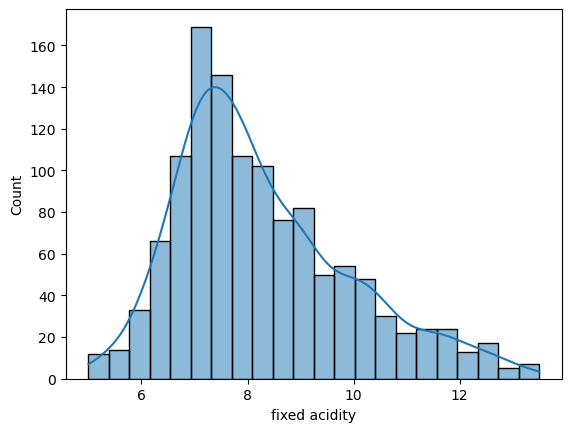

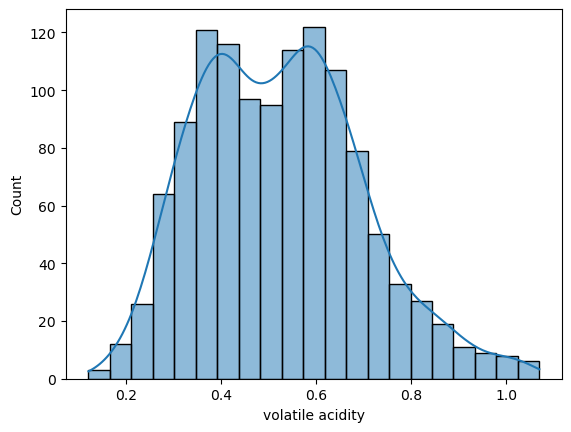

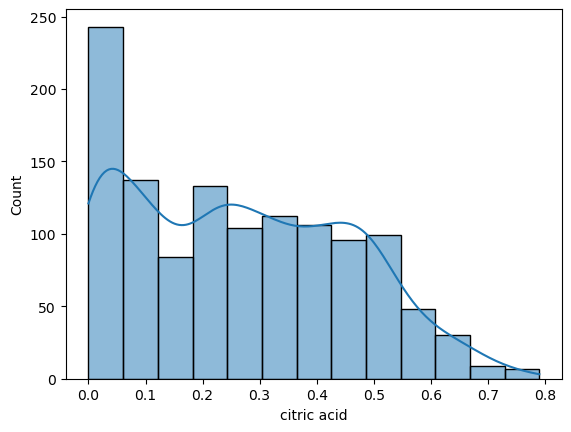

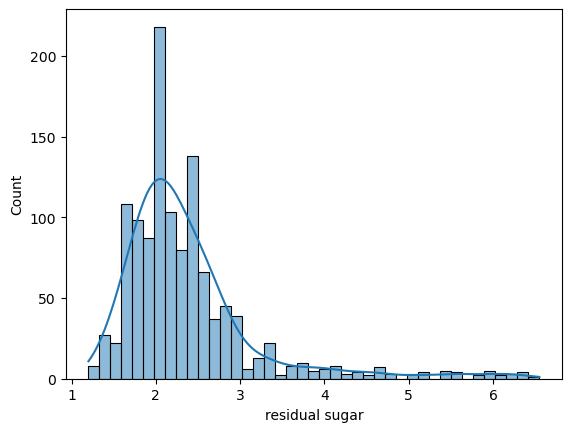

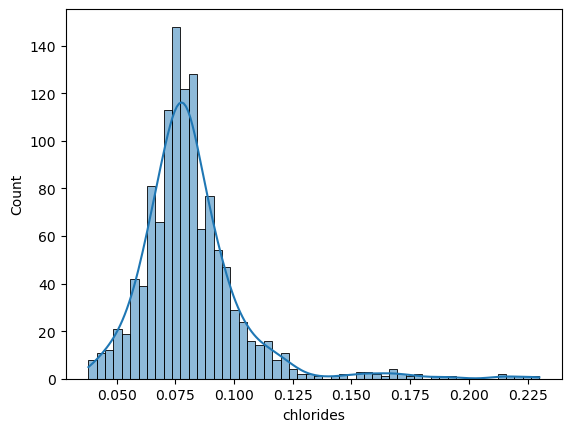

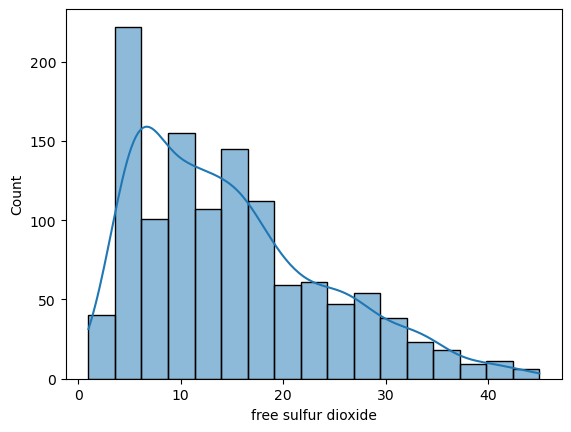

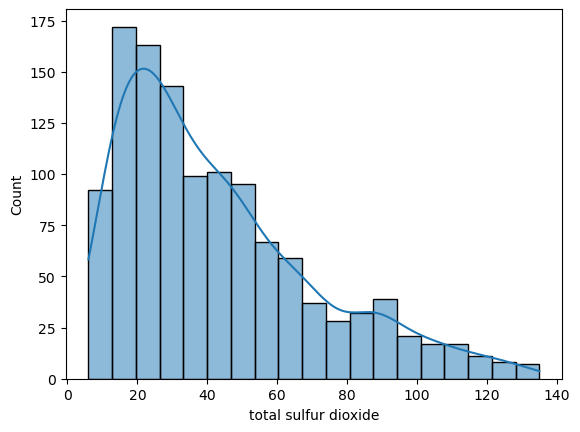

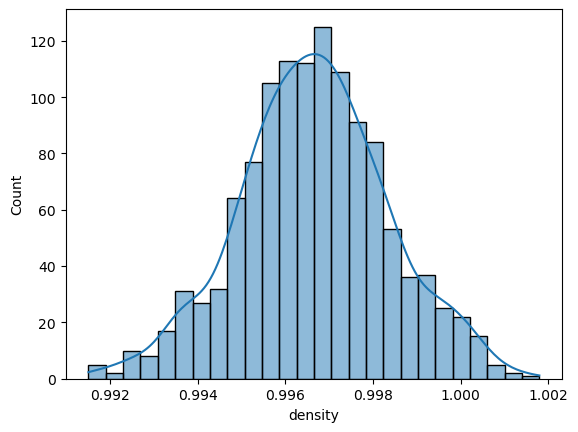

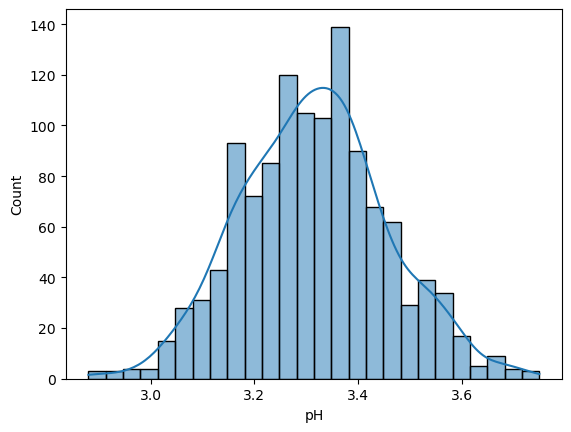

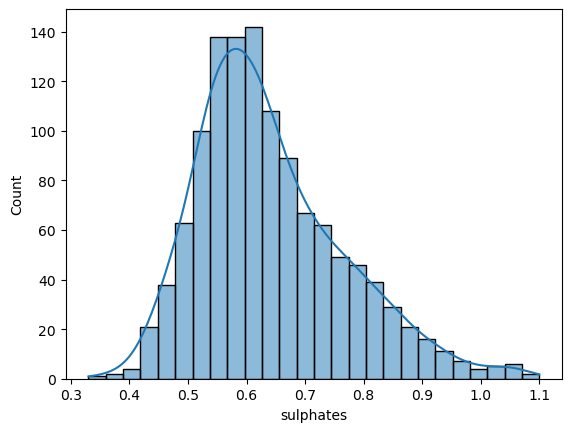

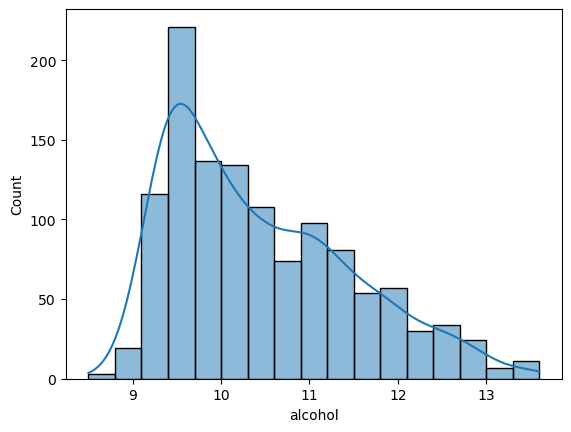

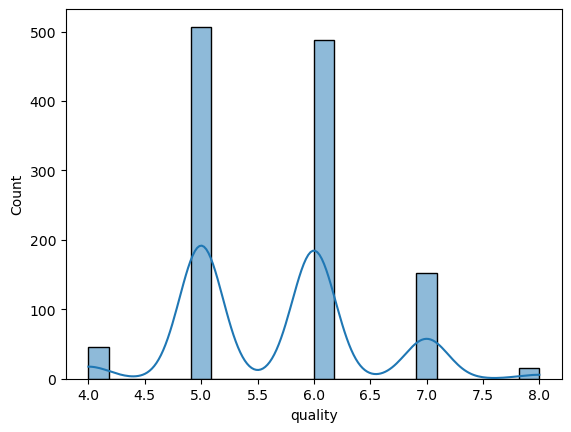

In [84]:
for i in df_r.columns:
    sns.histplot(df_r[i], kde=True)
    plt.show()


In [86]:
df_w=outliers_idr(white_wine)
df_w.shape

(3602, 12)

In [88]:
white_wine.shape

(3961, 12)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='quality_lable'>

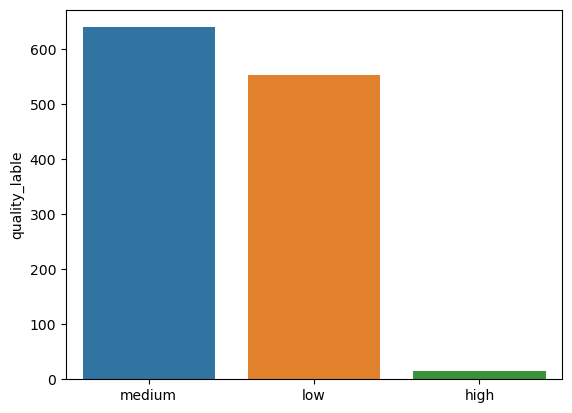

In [93]:
df_r['quality_lable']=df_r['quality']. apply(lambda x : 'low' if x <=5 else 'medium' if x <=7 else 'high' )
sns.barplot( df_r['quality_lable'].value_counts().index, df_r['quality_lable'].value_counts())


In [94]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1208 non-null   float64
 1   volatile acidity      1208 non-null   float64
 2   citric acid           1208 non-null   float64
 3   residual sugar        1208 non-null   float64
 4   chlorides             1208 non-null   float64
 5   free sulfur dioxide   1208 non-null   float64
 6   total sulfur dioxide  1208 non-null   float64
 7   density               1208 non-null   float64
 8   pH                    1208 non-null   float64
 9   sulphates             1208 non-null   float64
 10  alcohol               1208 non-null   float64
 11  quality               1208 non-null   int64  
 12  quality_lable         1208 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 132.1+ KB


In [98]:

df_r['quality_lable']=pd.Categorical(df_r['quality_lable'], categories= ['low', 'medium', 'high'])
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1208 non-null   float64 
 1   volatile acidity      1208 non-null   float64 
 2   citric acid           1208 non-null   float64 
 3   residual sugar        1208 non-null   float64 
 4   chlorides             1208 non-null   float64 
 5   free sulfur dioxide   1208 non-null   float64 
 6   total sulfur dioxide  1208 non-null   float64 
 7   density               1208 non-null   float64 
 8   pH                    1208 non-null   float64 
 9   sulphates             1208 non-null   float64 
 10  alcohol               1208 non-null   float64 
 11  quality               1208 non-null   int64   
 12  quality_lable         1208 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 124.0 KB


In [101]:
df_w['quality_lable']=df_w['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7 else 'high')
df_w['quality_lable']=pd.Categorical(df_w['quality_lable'], categories=['low', 'medium','high'])
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3602 entries, 1 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         3602 non-null   float64 
 1   volatile acidity      3602 non-null   float64 
 2   citric acid           3602 non-null   float64 
 3   residual sugar        3602 non-null   float64 
 4   chlorides             3602 non-null   float64 
 5   free sulfur dioxide   3602 non-null   float64 
 6   total sulfur dioxide  3602 non-null   float64 
 7   density               3602 non-null   float64 
 8   pH                    3602 non-null   float64 
 9   sulphates             3602 non-null   float64 
 10  alcohol               3602 non-null   float64 
 11  quality               3602 non-null   int64   
 12  quality_lable         3602 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 369.5 KB


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='quality_lable'>

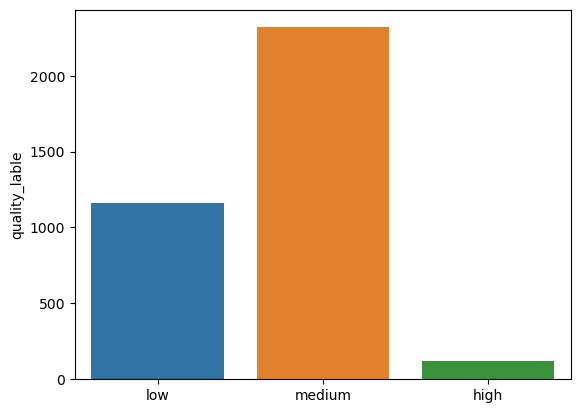

In [103]:


sns.barplot(df_w['quality_lable'].value_counts().index, df_w['quality_lable'].value_counts())

In [108]:
df_r.quantile(0.75)

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.089000
free sulfur dioxide     21.000000
total sulfur dioxide    58.000000
density                  0.997752
pH                       3.400000
sulphates                0.710000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64

In [110]:
np.percentile(df_r['fixed acidity'],75)

9.2